# Running and analysing a basic queueing network with Ciw

### Import Ciw and any other libraries

In [1]:
%matplotlib inline

In [2]:
import ciw
import matplotlib
import matplotlib.pyplot as plt

(ensure latest version of libraries)

In [3]:
assert ciw.__version__ == '1.1.5'
assert matplotlib.__version__ == '2.0.0'

### First define the and create a Network object

In [4]:
N = ciw.create_network(
    Arrival_distributions=[['Exponential', 6.0], ['Exponential', 2.5]],
    Number_of_servers=[1, 1],
    Queue_capacities=['Inf', 4],
    Service_distributions=[['Exponential', 8.5], ['Exponential', 5.5]],
    Transition_matrices=[[0.0, 0.2], [0.1, 0.0]]
)

### Now create a Simulation object, and simulate for 1000 time units

In [5]:
ciw.seed(0)
Q = ciw.Simulation(N)

In [6]:
Q.simulate_until_max_time(1000)

### The simulation is now run, let's analyse waiting times, determine a warm-up time of 50 time units

In [7]:
recs = Q.get_all_records()

In [8]:
waits = [r.waiting_time for r in recs if r.arrival_date > 50]

In [9]:
mean_wait = sum(waits)/len(waits)
print(mean_wait)

0.3216866783621386


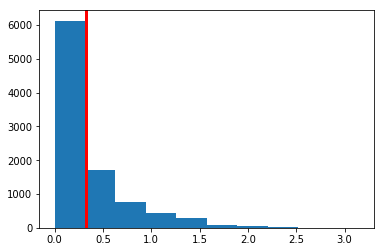

In [10]:
plt.hist(waits)
plt.axvline(x=mean_wait, linewidth=3, c='r')
plt.show()